# Stock Price Prediction and Analysis

## Project done by - Anushka Dhekne (VD19739) 

# Q.1) What was the change in price of the stock overtime?

## Importing the Libraries and Getting the Data

In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
tech_list = ['META', 'NFLX', 'TSLA', 'NVDA']
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
company_list = [META, NFLX, TSLA, NVDA]
company_name = ['META', 'NETFLIX', 'TESLA', 'NVDIA']
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [7]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-25,169.000000,170.570007,164.809998,166.649994,166.649994,26166300,META
2022-07-26,165.940002,166.000000,157.949997,159.149994,159.149994,28468400,META
2022-07-27,162.589996,170.869995,162.020004,169.580002,169.580002,43846600,META
2022-07-28,161.059998,161.509995,154.850006,160.720001,160.720001,73214300,META
2022-07-29,157.690002,160.139999,155.169998,159.100006,159.100006,42065400,META
...,...,...,...,...,...,...,...
2023-07-17,462.890015,464.959991,452.619995,464.609985,464.609985,51048800,NVDIA
2023-07-18,467.010010,478.959991,457.339996,474.940002,474.940002,57019000,NVDIA
2023-07-19,474.640015,478.179993,467.420013,470.769989,470.769989,42750200,NVDIA


## Data Statistics

In [8]:
META.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,180.755840,184.038080,178.423640,181.276920,181.276920,3.221760e+07
std,58.529179,59.102402,58.000831,58.640327,58.640327,2.200995e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,8.629300e+06
25%,132.899998,136.827503,131.489994,133.284996,133.284996,2.089348e+07
50%,168.974998,172.235001,167.205002,169.915001,169.915001,2.613595e+07
75%,215.667496,219.662502,215.120003,217.442501,217.442501,3.537962e+07
max,313.619995,318.679993,310.519989,316.010010,316.010010,2.323166e+08


In [9]:
META.shape

(250, 7)

In [10]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,313.839600,319.700200,308.829080,314.475560,314.475560,8.748843e+06
std,64.742217,64.964692,64.393535,64.845249,64.845249,5.132746e+06
min,212.690002,219.389999,211.639999,213.910004,213.910004,2.657900e+06
25%,260.205009,262.382492,254.495003,259.147507,259.147507,5.620900e+06
50%,312.379990,321.600006,310.190002,315.175003,315.175003,7.251950e+06
75%,347.745003,354.412506,343.572510,348.199997,348.199997,9.771400e+06
max,476.859985,485.000000,470.000000,477.589996,477.589996,4.668530e+07


In [11]:
NFLX.shape

(250, 7)

In [12]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,213.146147,217.779280,208.089600,212.997280,212.997280,1.246689e+08
std,53.724161,54.254590,53.062111,53.568526,53.568526,4.946293e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.367504,182.379997,172.502499,178.187496,178.187496,8.532052e+07
50%,198.234993,202.845001,192.885002,197.474998,197.474998,1.200864e+08
75%,265.564995,270.174995,259.362511,262.617493,262.617493,1.600711e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


In [13]:
TSLA.shape

(250, 7)

In [14]:
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,227.896160,232.572560,223.992039,228.676880,228.621268,5.079725e+07
std,97.535288,98.833007,96.230345,97.496650,97.522370,1.609483e+07
min,109.709999,117.349998,108.129997,112.269997,112.210602,1.679340e+07
25%,154.147499,159.719997,151.204998,155.079994,154.973507,4.036298e+07
50%,188.380005,192.595001,186.395004,191.774994,191.722588,4.810125e+07
75%,273.682510,278.229996,271.042488,275.347496,275.318993,5.694192e+07
max,474.640015,480.880005,467.420013,474.940002,474.940002,1.543911e+08


In [15]:
NVDA.shape

(250, 7)

In [16]:
META.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-07-25 to 2023-07-21
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

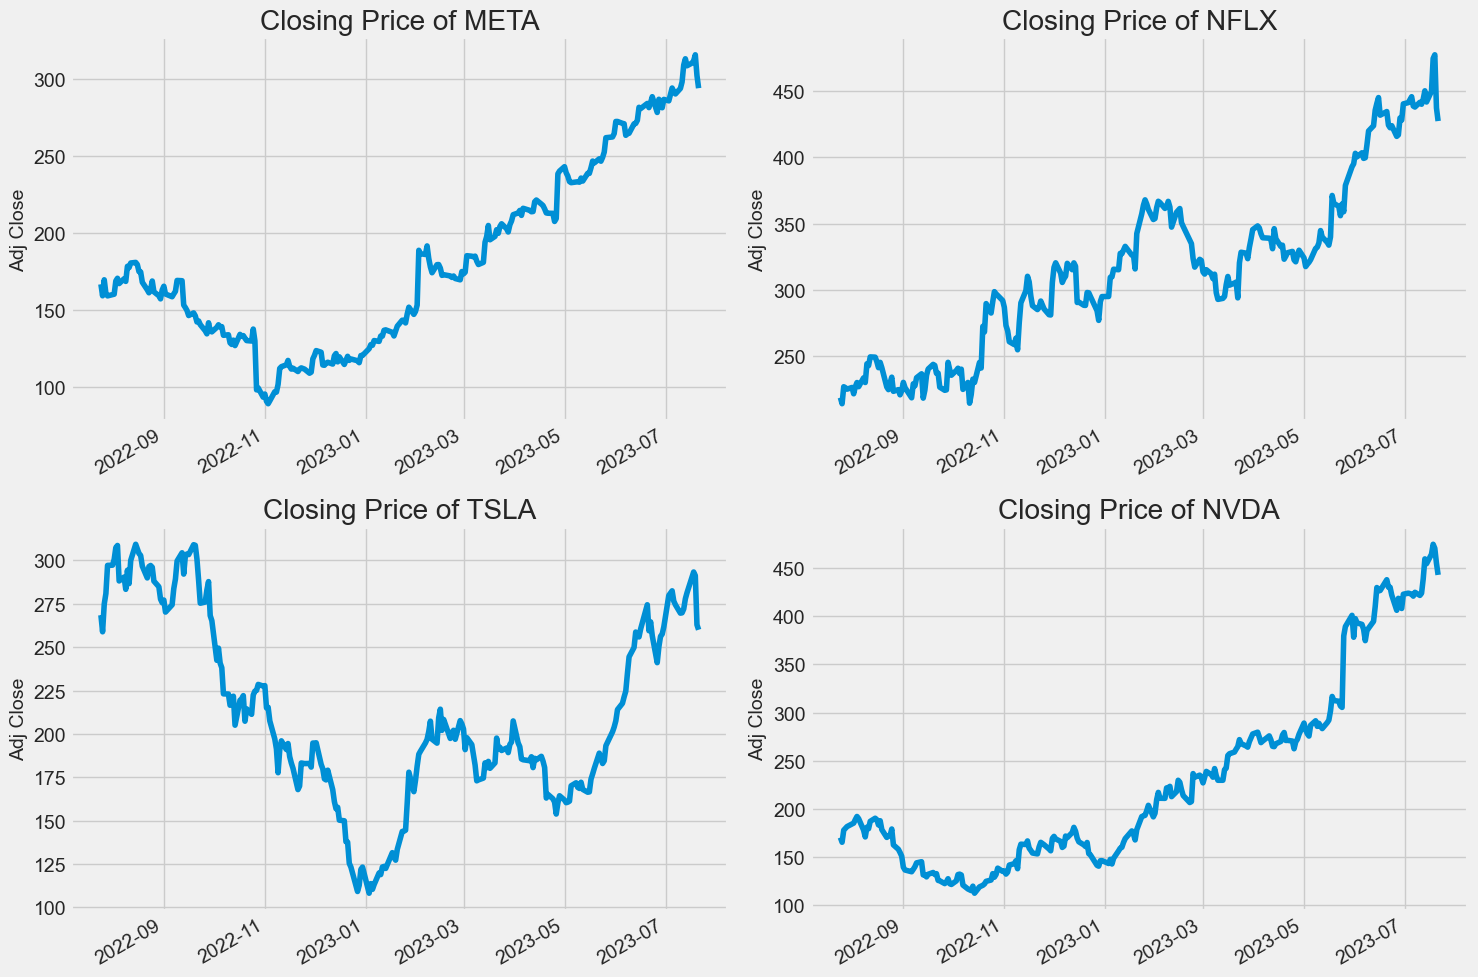

In [17]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
#plt.subplots_adjust(top=1, bottom=1)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

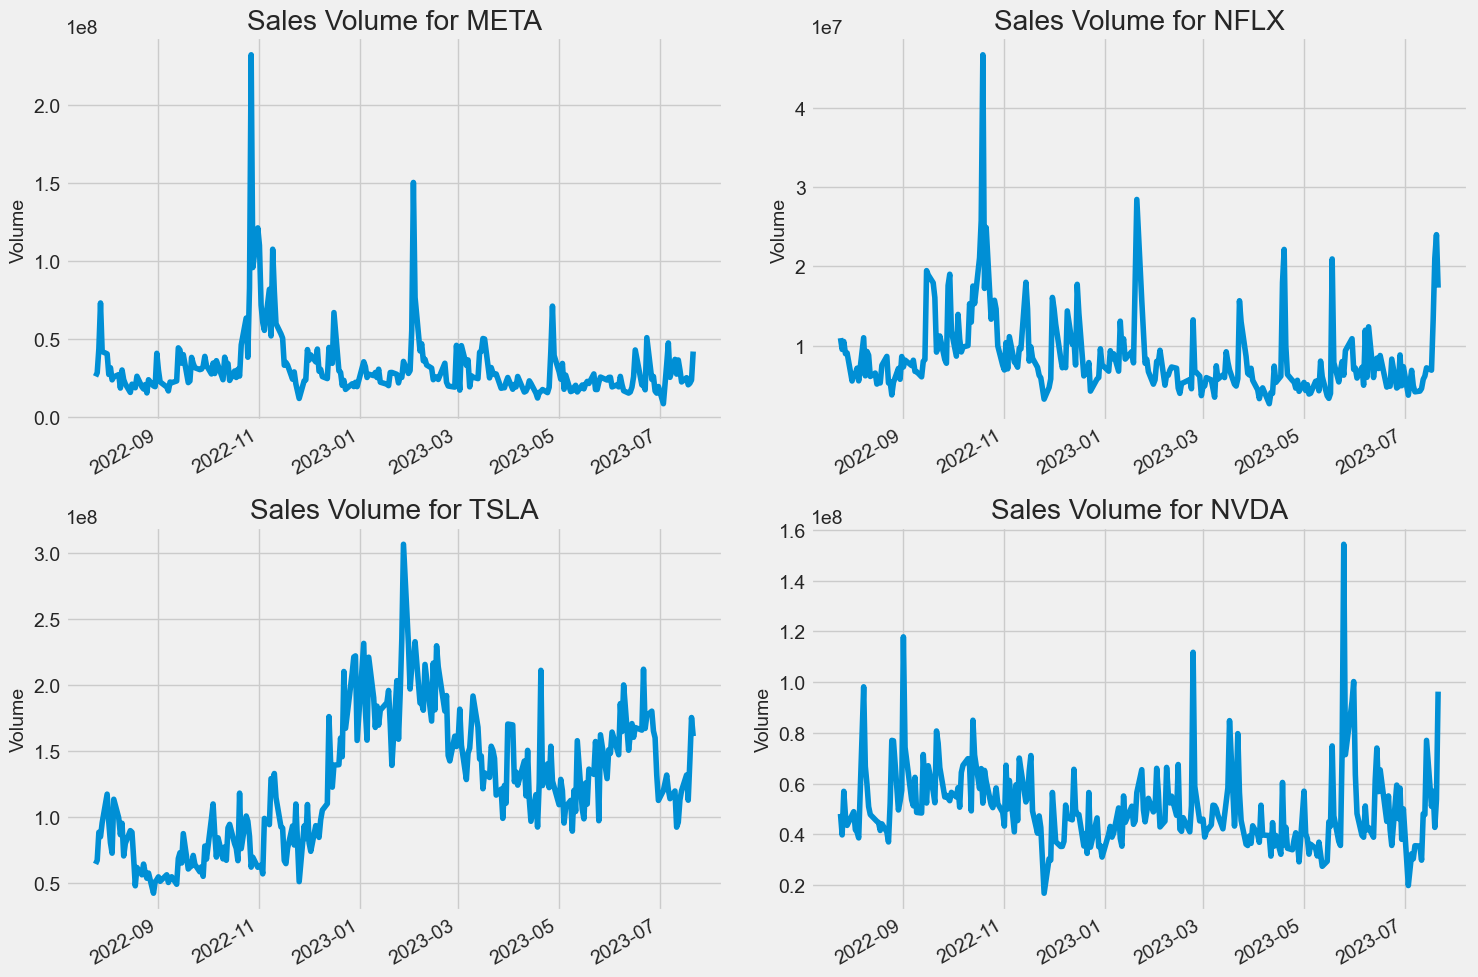

In [18]:
# Plot the total volume of stock being traded each day.
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Q.2) What was the moving average of the various stocks?

In [19]:
ma_day = [10, 50, 100]
for k in ma_day:
    for company in company_list:
        column_name = f"MA for {k} days"
        company[column_name] = company['Adj Close'].rolling(k).mean()

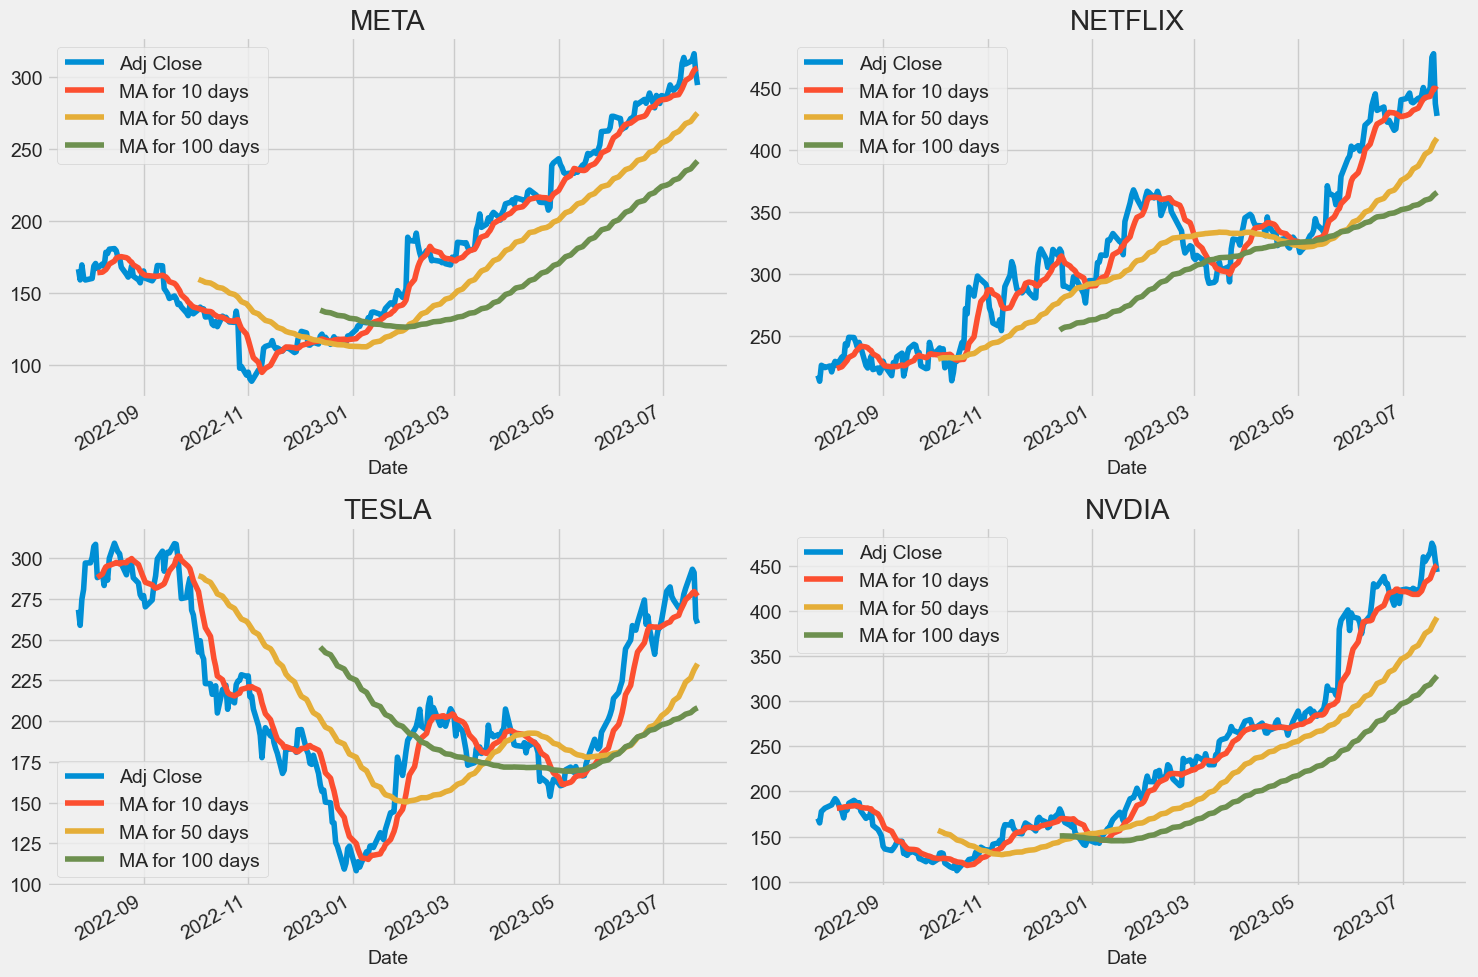

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

META[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,0])
axes[0,0].set_title('META')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NETFLIX')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NVDIA')

fig.tight_layout()

# Q.3) What was the daily return of the stock on average?

In [21]:
# Use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

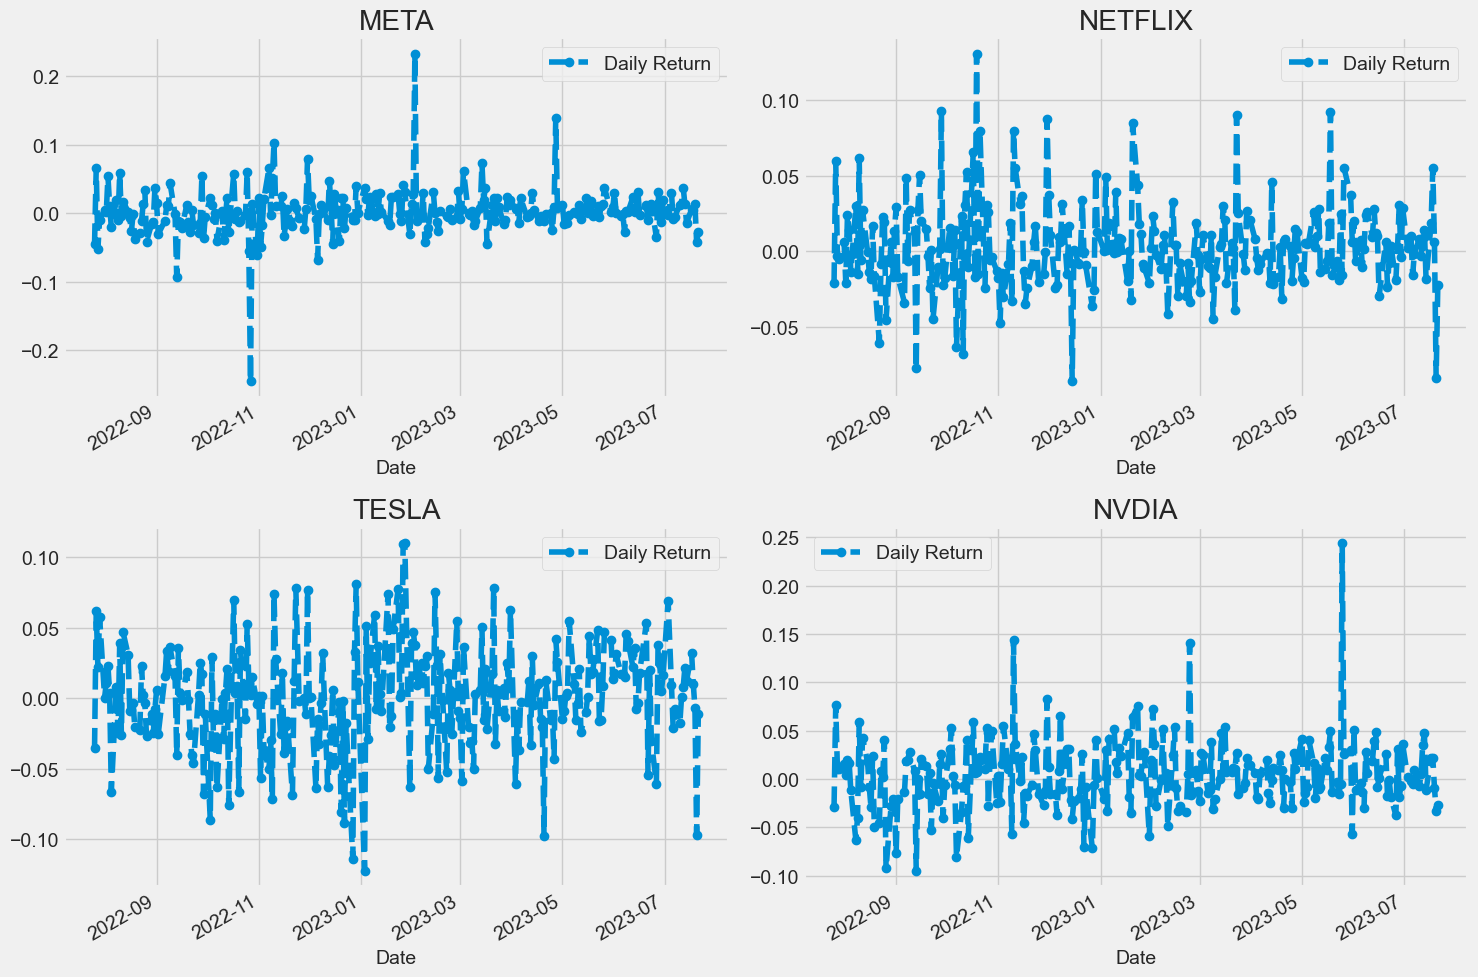

In [22]:
# Plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

META['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('META')

NFLX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('NETFLIX')

TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('NVDIA')

fig.tight_layout()

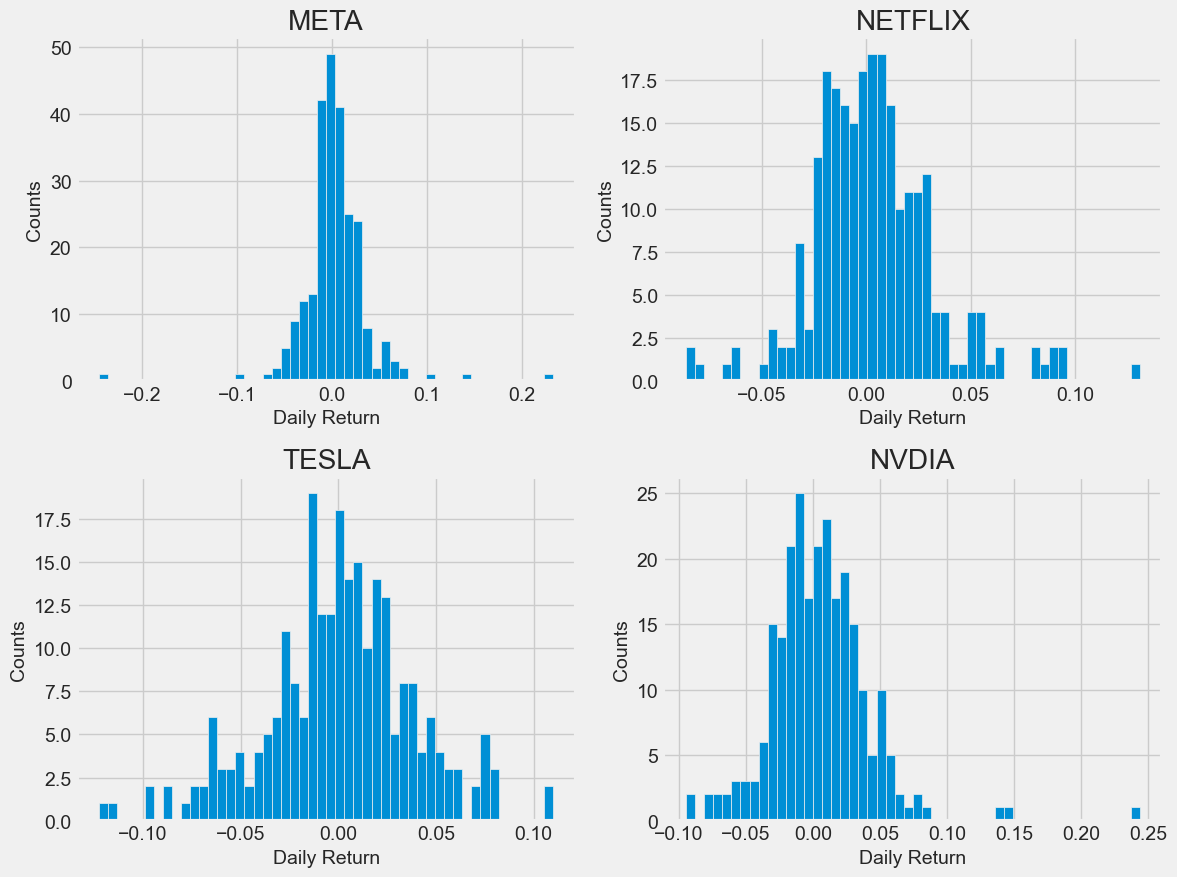

In [23]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# Q.4) What was the correlation between different stocks closing prices?

In [24]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,META,NFLX,NVDA,TSLA
Date,,,,
2022-07-25,NaN,NaN,NaN,NaN
2022-07-26,-0.045005,-0.021052,-0.028842,-0.035664
2022-07-27,0.065536,0.060025,0.076030,0.061655
2022-07-28,-0.052247,-0.003219,0.010905,0.022124
2022-07-29,-0.010080,-0.004955,0.009953,0.057850


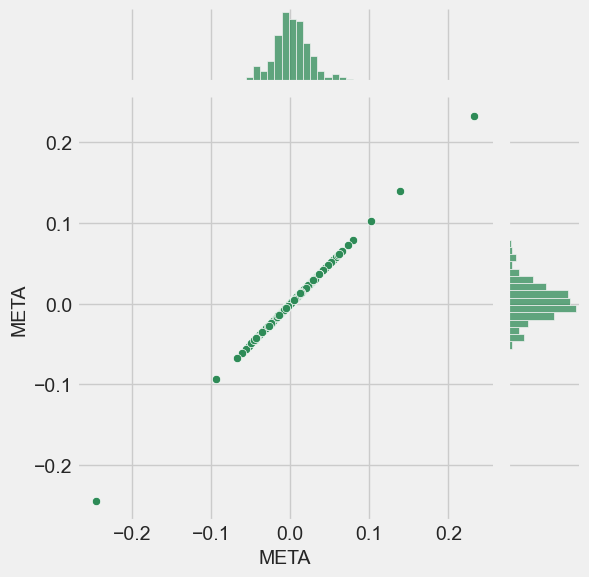

In [25]:
# Comparing META to itself shows a perfectly linear relationship.
sns.jointplot(x='META', y='META', data=tech_rets, kind='scatter', color='seagreen');

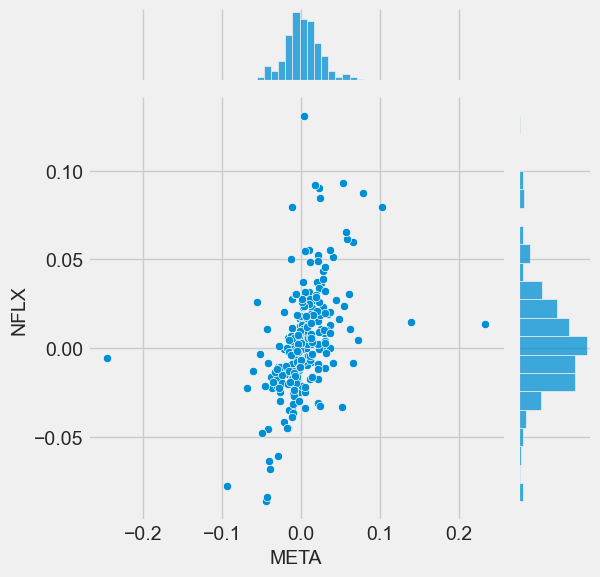

In [26]:
# We use a joinplot to compare the daily returns of META and NETFLIX.
sns.jointplot(x='META', y='NFLX', data=tech_rets, kind='scatter');

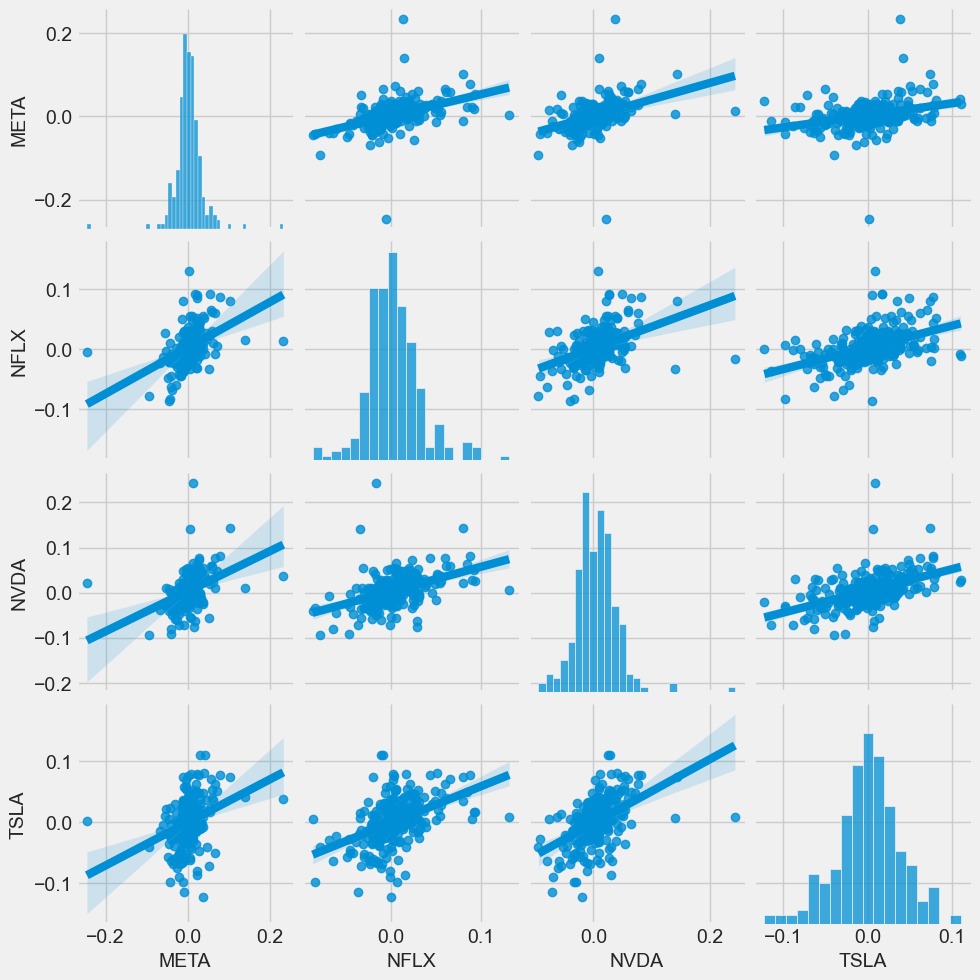

In [27]:
# Call pairplot on our DataFrame for an automatic visual analysis of all the comparisons.
sns.pairplot(tech_rets, kind='reg')

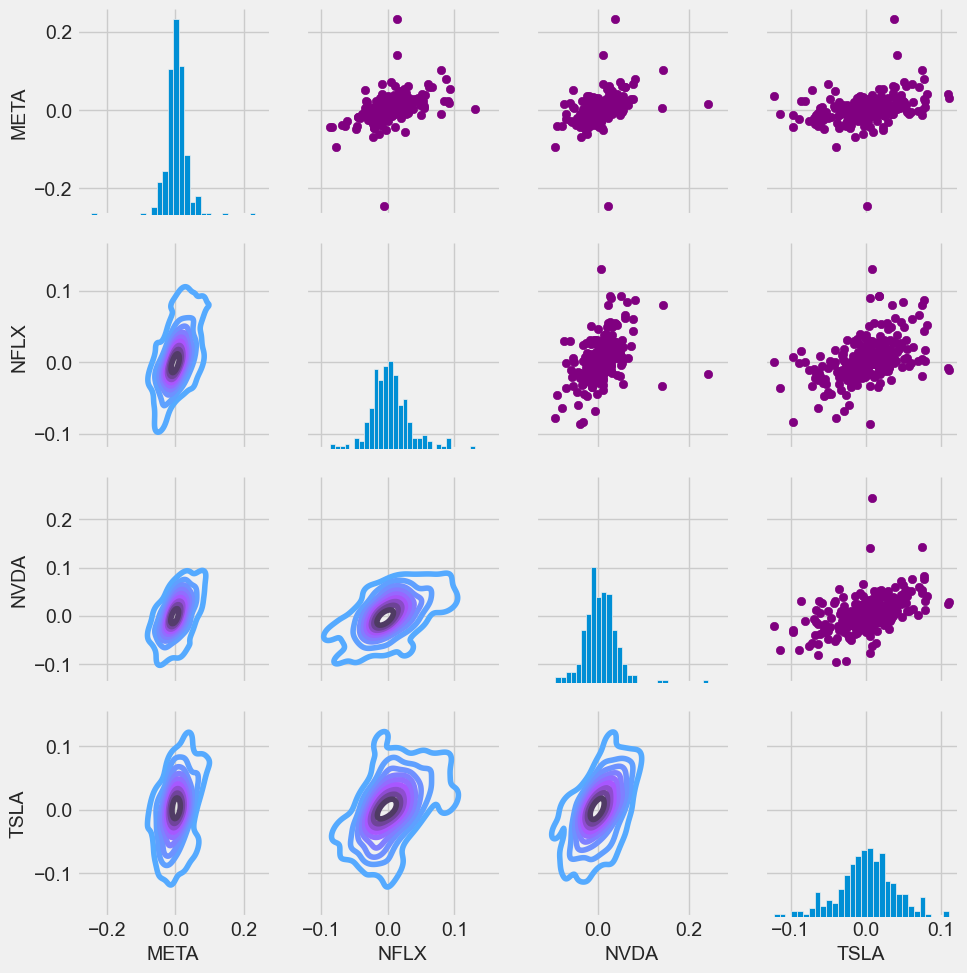

In [28]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper specifies what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

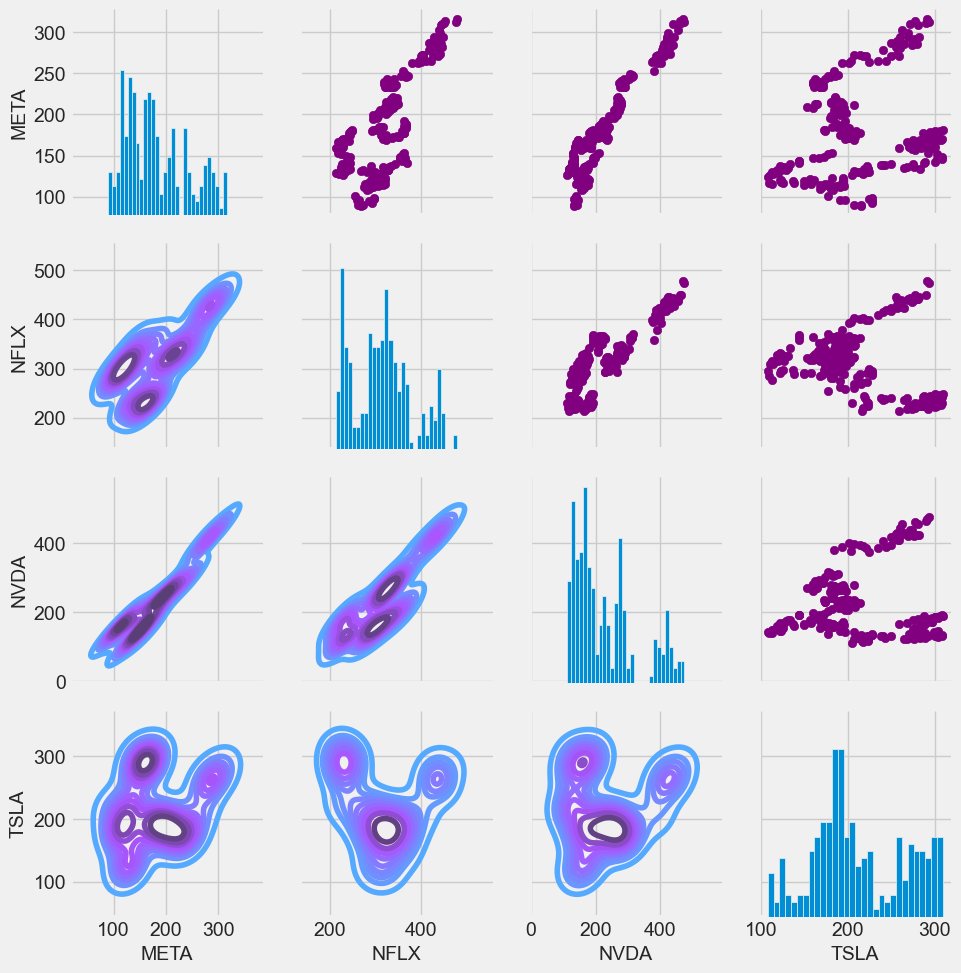

In [29]:
returns_fig = sns.PairGrid(closing_df)

# Specify  what the upper triangle will look like using map_upper
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

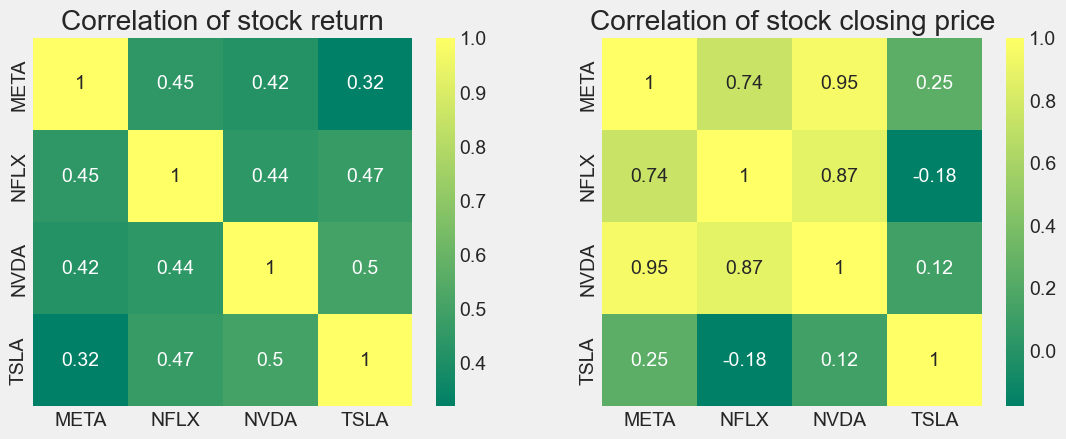

In [30]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Q.5) How much value do we put at risk by investing in a particular stock?

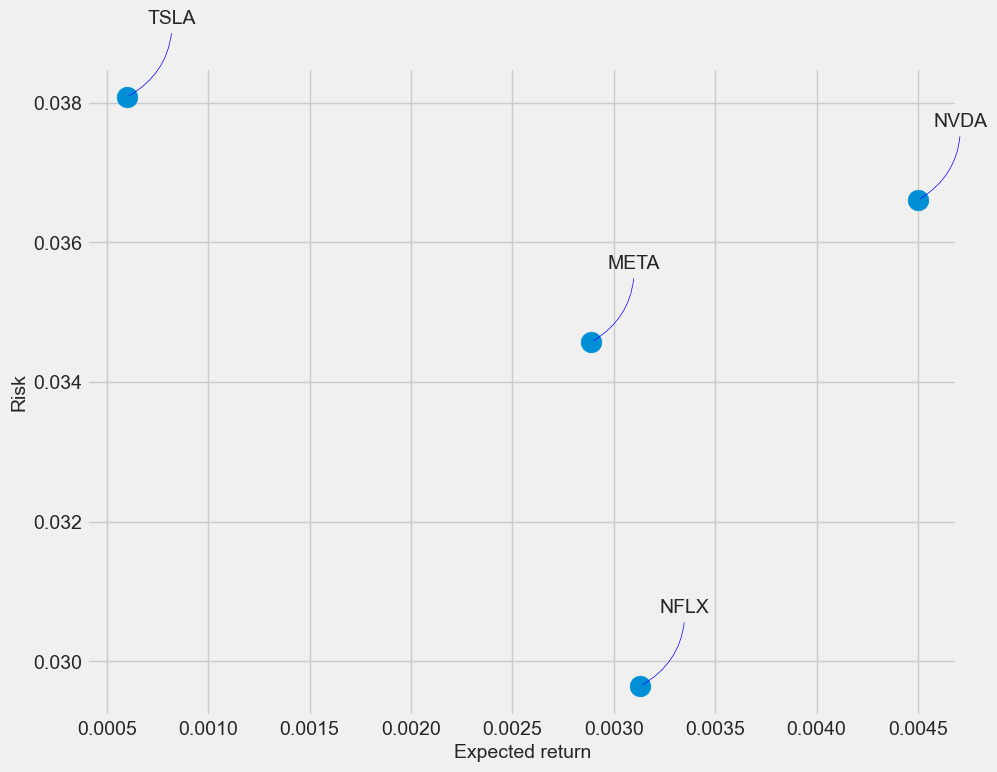

In [31]:
rets = tech_rets.dropna()

area = np.pi * 70

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Q.6) Predicting the closing price stock price of META

In [32]:
df_2 = pdr.get_data_yahoo('META', start='2012-01-01', end=datetime.now())
df_2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-07-17,307.540009,311.709991,304.709991,310.619995,310.619995,25323100
2023-07-18,310.880005,314.200012,307.619995,312.049988,312.049988,20764600
2023-07-19,313.029999,318.679993,310.519989,316.010010,316.010010,21763700


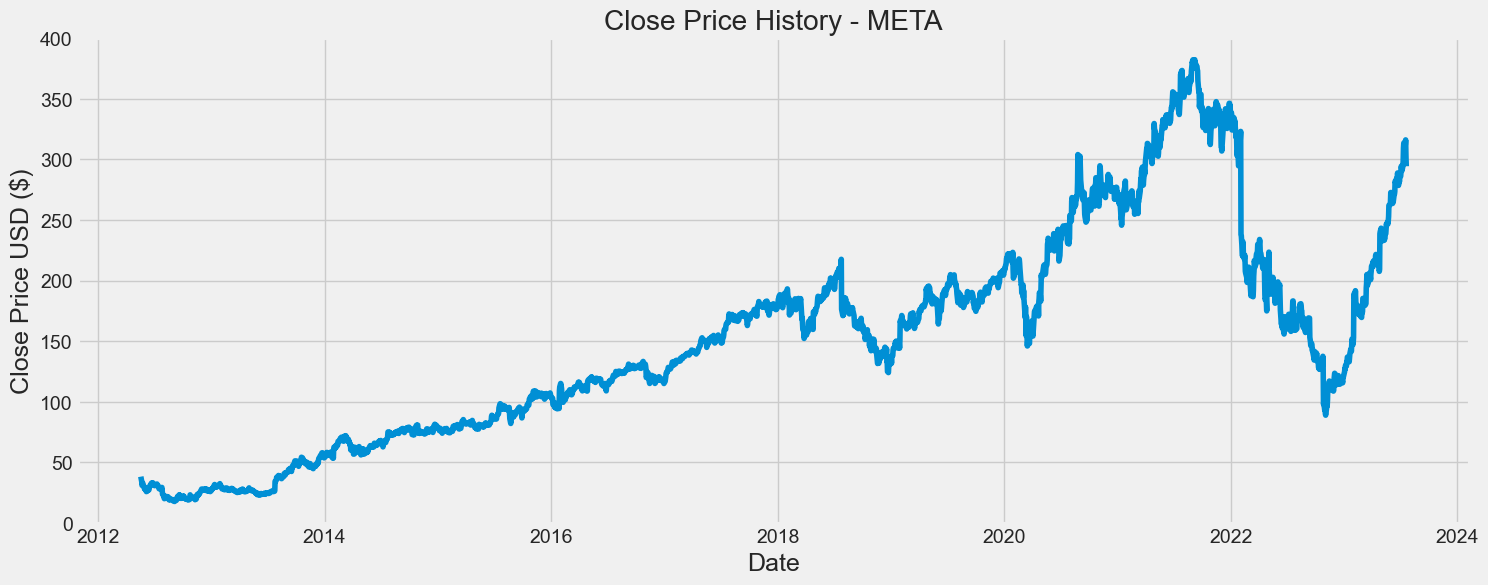

In [45]:
plt.figure(figsize=(16,6))
plt.title('Close Price History - META')
plt.plot(df_2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [34]:
data = df_2.filter(['Close'])
# Convert the dataframe to a numpy array and get the number of rows to train the model on.
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2671

In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.81843879],
       [0.78142405],
       [0.75875982]])

In [37]:
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.02491425, 0.02354232, 0.02570998,
       0.02546303, 0.02653313, 0.02617643, 0.02897517, 0.03369461,
       0.03753601, 0.03890795, 0.03805735, 0.03871588, 0.04203594,
       0.03931953, 0.04217314, 0.03978598, 0.03739882, 0.03668542,
       0.03577995, 0.03695981, 0.03770064, 0.03841405, 0.03962134,
       0.03770064, 0.03632871, 0.0358897 , 0.03564275, 0.02886542,
       0.0284264 , 0.03122514, 0.03092331, 0.03026479, 0.03023735,
       0.02941419, 0.03185622, 0.02502401, 0.01640829, 0.01487173,
       0.01092056, 0.00864316, 0.00633832, 0.00921937, 0.01149678,
       0.00820414, 0.00820414, 0.00899986, 0.01119495, 0.01061874])]
[0.007271229711778966]

[array([0.05624914, 0.04472493, 0.03641103, 0.03915489, 0.04198107,
       0.03890795, 0.03048429, 0.02870079, 0.03256963, 0.02741117,
       0.0251612 , 0.02233503, 0.0

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
2611/2611 [==============================] - 46s 17ms/step - loss: 0.0013
Epoch 2/50
2611/2611 [==============================] - 43s 16ms/step - loss: 5.8210e-04
Epoch 3/50
2611/2611 [==============================] - 40s 15ms/step - loss: 4.7629e-04
Epoch 4/50
2611/2611 [==============================] - 41s 16ms/step - loss: 4.2099e-04
Epoch 5/50
2611/2611 [==============================] - 41s 16ms/step - loss: 3.9825e-04
Epoch 6/50
2611/2611 [==============================] - 43s 17ms/step - loss: 3.1439e-04
Epoch 7/50
2611/2611 [==============================] - 41s 16ms/step - loss: 3.5030e-04
Epoch 8/50
2611/2611 [==============================] - 40s 15ms/step - loss: 3.3515e-04
Epoch 9/50
2611/2611 [==============================] - 39s 15ms/step - loss: 2.7499e-04
Epoch 10/50
2611/2611 [==============================] - 43s 16ms/step - loss: 3.1984e-04
Epoch 11/50
2611/2611 [==============================] - 41s 16ms/step - loss: 2.8184e-04
Epoch 12/50
2611/2611 [

In [39]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 17ms/step


7.0880017895972225

C:\Users\AnushkaDhekne\AppData\Local\Temp\ipykernel_58500\2603199341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


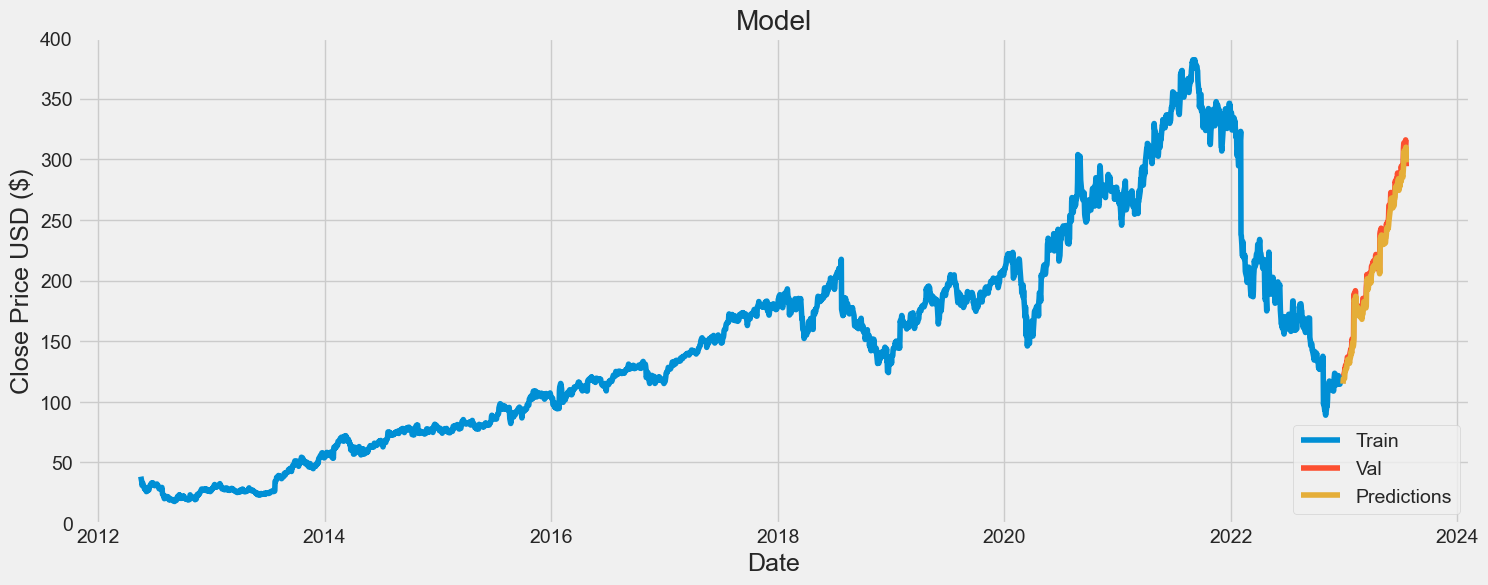

In [40]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# Get the valid and predicted stock closing prices.
valid

,Close,Predictions
Date,,
2022-12-29,120.260002,114.861580
2022-12-30,120.339996,118.965706
2023-01-03,124.739998,119.123901
2023-01-04,127.370003,123.229507
2023-01-05,126.940002,125.620667
...,...,...
2023-07-17,310.619995,302.110016
2023-07-18,312.049988,303.611755
2023-07-19,316.010010,306.332703


## Getting Model Accuracy

In [42]:
import sklearn

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

old = valid[['Close']]
new = valid[['Predictions']]
r2_score(old, new)

0.9820577011781978

## Saving dataframes as .csv files for further analysis and visualizations

In [44]:
# Original Dataframe for the 4 stocks
df.to_csv('D:/Summer23/Financial_Data_Science/all_stocks.csv')  

 # DataFrame with all the ['Close'] columns for each of the stocks
tech_rets.to_csv('D:/Summer23/Financial_Data_Science/closing_prices.csv')  

# Closing price stock of META
df_2.to_csv('D:/Summer23/Financial_Data_Science/META_closing.csv')  

# Dataframe of the valid and predicted stock closing prices
valid.to_csv('D:/Summer23/Financial_Data_Science/predictions.csv')  